# Lecture 4 - exercises

In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt 

## Q1: Simple numerical integral

Numerical integration methods work differently depending on whether you have the analytic function available (in which case you can evaluate it freely at any point you please) or if it is sampled for you.

Consider the function $f(x) = e^{-x^2}$.  We want to integrate this from $[-5, 5]$.  The
analytic integral is not easily obtained.  Use `integrate.quad` to do the integration.

In [2]:
def f(x):
    return np.exp(-x**2) 


I, err = integrate.quad(f, -5, 5)
print(f"Intergral: {I}, error : {err}")

Intergral: 1.7724538509027912, error : 4.6261378229003154e-14


Consider now that you have data that represents a function sampled a `N` points, but you don't know the analytic form of the function.  Here, we create the sampling from a uniform distribution

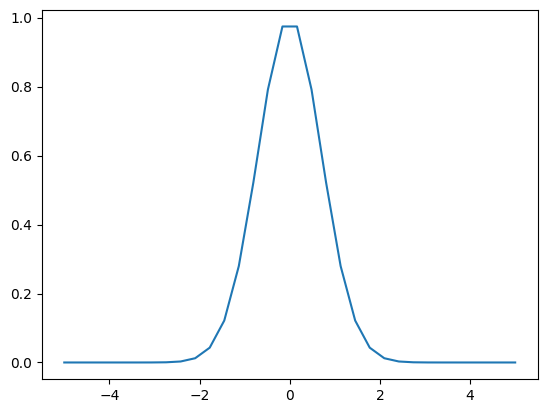

In [3]:
N = 32
x = np.linspace(-5, 5, N)
y = np.exp(-x**2)

plt.plot(x,y)

Compute the integral of this sampled function using Simpson's method (`integrate.simps`).  Now, vary the number of sample points (try 64, 128, ...) and see how the answer changes.  Simpson's method is 4-th order accurate, which means that the error should decrease by $2^4$ when we double the number of sample points.

In [4]:
I_simps = integrate.simps(y, x)
print(I_simps)

1.7724538507774263


In [5]:
N = 32
errors = []
Ns = []

for i in range (4):
    N = N * 2
    x = np.linspace(-5, 5, N)
    f = np.exp(-x**2)

    I_simps = integrate.simps(f, x)
    error = abs(I_simps - I)    

    Ns.append(N)
    errors.append(error)

    
    print(f"N = {N}, Integral : {I_simps}, error : {error}")

N = 64, Integral : 1.7724538509012102, error : 1.580957587066223e-12
N = 128, Integral : 1.7724538509027423, error : 4.884981308350689e-14
N = 256, Integral : 1.7724538509027887, error : 2.4424906541753444e-15
N = 512, Integral : 1.7724538509027907, error : 4.440892098500626e-16


Make a plot of the error (compared to the quadrature result) vs. N

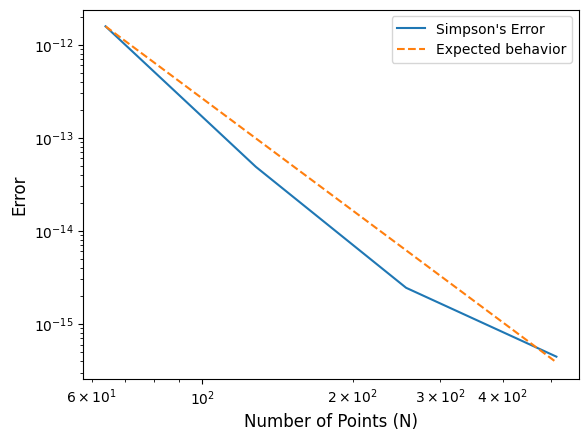

In [6]:
plt.loglog(Ns, errors, label="Simpson's Error") 
plt.loglog(Ns, [errors[0] / (2**(4*i)) for i in range(len(Ns))], '--', label='Expected behavior')


plt.xlabel("Number of Points (N)", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend()


## Q3: Basins of attraction

Consider the function

$$q(x) = x^3 - 2x^2 - 11x + 12$$

This has 3 roots has you should find them all. This equation is known to cause problems for some root-finding methods because it exhibits [basis of attraction](https://en.wikipedia.org/wiki/Newton%27s_method#Basins_of_attraction) -- very closely spaced initial guesses leave to very different roots.

Use the scipy `optimize.brentq` method to find the roots.  You might need to play around with the intervals to find all 3 roots (try plotting the function to help)

In [7]:
import scipy.optimize as optimize

def q(x):
    return x**3 - 2*x**2 - 11*x + 12

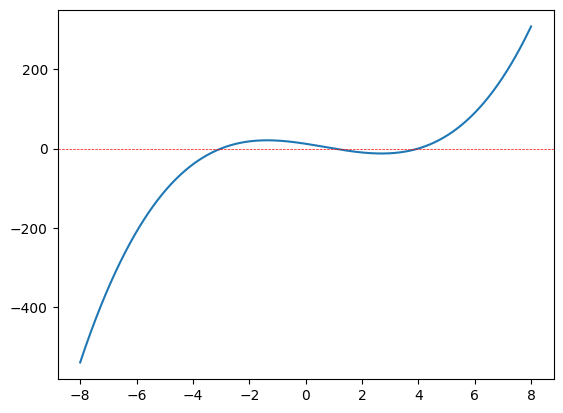

In [8]:
x = np.linspace(-8, 8.0, 1000)

fig, ax = plt.subplots()
ax.plot(x, q(x))
ax.axhline(0, color='r', linestyle='--', linewidth=0.5)

In [9]:
root1, r1 = optimize.brentq(q, -8.0, 0.1, full_output=True)

print(root1)
print(r1.converged)

-2.999999999999646
True


In [10]:
root2, r2 = optimize.brentq(q, 0.1, 2.0, full_output=True)

print(root2)
print(r2.converged)

0.9999999999999959
True


In [11]:
root3, r3 = optimize.brentq(q, 2.0, 5.0, full_output=True)

print(root3)
print(r3.converged)

4.0
True


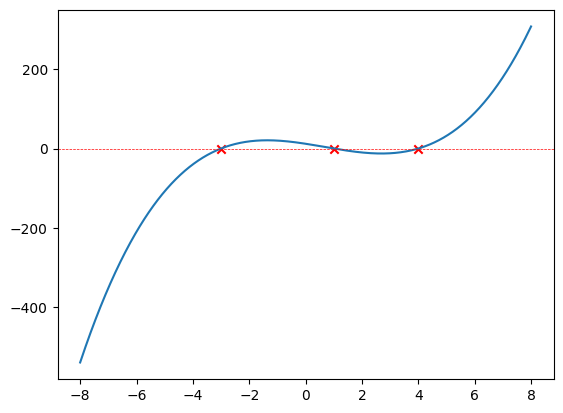

In [12]:
x = np.linspace(-8, 8.0, 1000)

fig, ax = plt.subplots()
ax.plot(x, q(x))

ax.axhline(0, color='r', linestyle='--', linewidth=0.5)


ax.scatter(root1, q(root1), marker="x", color="r")
ax.scatter(root2, q(root2), marker="x", color="r")
ax.scatter(root3, q(root3), marker="x", color="r")